In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os

In [5]:
train_dir = "data/train"
test_dir = "data/test"

In [6]:
os.listdir(train_dir)

['.DS_Store', 'PNEUMONIA', 'NORMAL']

In [9]:
len(os.listdir(train_dir+"/NORMAL"))

1349

In [10]:
len(os.listdir(test_dir+"/NORMAL"))

234

In [11]:
len(os.listdir(train_dir+"/PNEUMONIA"))

3883

In [12]:
len(os.listdir(test_dir+"/PNEUMONIA"))

390

In [13]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

Found 5232 files belonging to 2 classes.


In [14]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)


Found 624 files belonging to 2 classes.


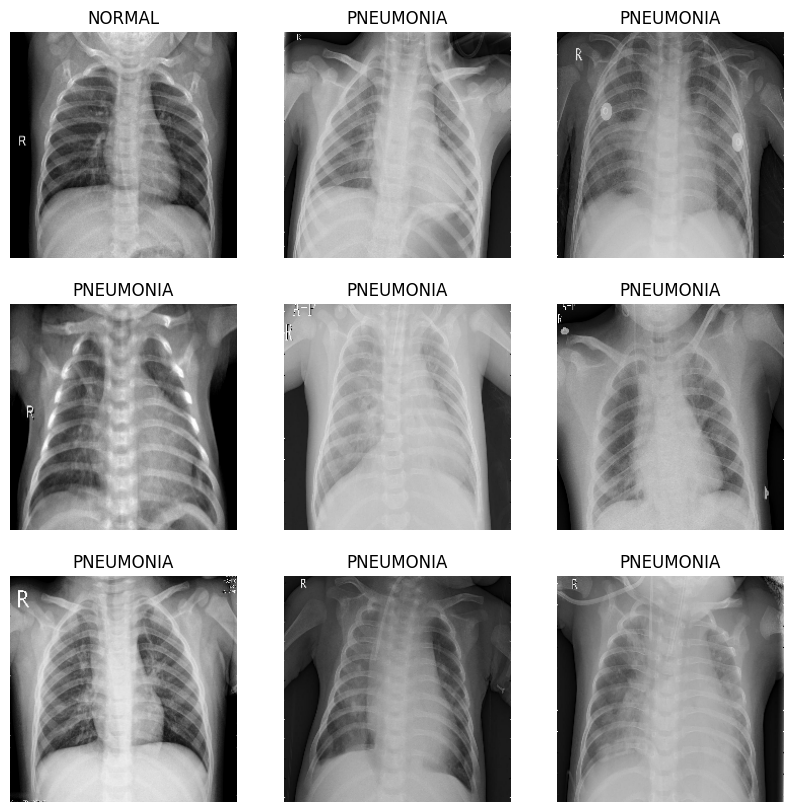

In [20]:
class_names = train_ds.class_names

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

plt.show()


In [21]:
class_names

['NORMAL', 'PNEUMONIA']

In [23]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train.map(lambda x,y: (normalization_layer(x), y))
test_ds = test.map(lambda x,y: (normalization_layer(x), y))

In [24]:
normalization_layer

In [25]:
test_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model

In [29]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
164/164 [==============================] - 104s 629ms/step - loss: 0.2498 - accuracy: 0.9023 - val_loss: 0.9042 - val_accuracy: 0.7324
Epoch 2/10
164/164 [==============================] - 97s 585ms/step - loss: 0.1194 - accuracy: 0.9524 - val_loss: 0.6076 - val_accuracy: 0.8125
Epoch 3/10
164/164 [==============================] - 88s 533ms/step - loss: 0.0931 - accuracy: 0.9664 - val_loss: 0.9797 - val_accuracy: 0.7708
Epoch 4/10
164/164 [==============================] - 84s 509ms/step - loss: 0.0728 - accuracy: 0.9715 - val_loss: 1.1528 - val_accuracy: 0.7612
Epoch 5/10
164/164 [==============================] - 84s 506ms/step - loss: 0.0554 - accuracy: 0.9795 - val_loss: 1.4872 - val_accuracy: 0.7292
Epoch 6/10
164/164 [==============================] - 87s 525ms/step - loss: 0.0546 - accuracy: 0.9794 - val_loss: 1.6714 - val_accuracy: 0.7276
Epoch 7/10
164/164 [==============================] - 88s 534ms/step - loss: 0.0407 - accuracy: 0.9839 - val_loss: 2.0791 - val_a

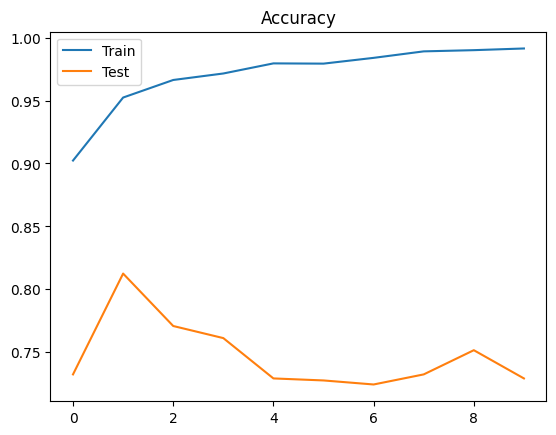

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Test"])
plt.title("Accuracy")
plt.show()

In [31]:
pred = model.predict(test_ds)
pred_labels = (pred > 0.5).astype(int)

true_labels = np.concatenate([y for x,y in test_ds], axis=0)

20/20 [==============================] - 3s 149ms/step


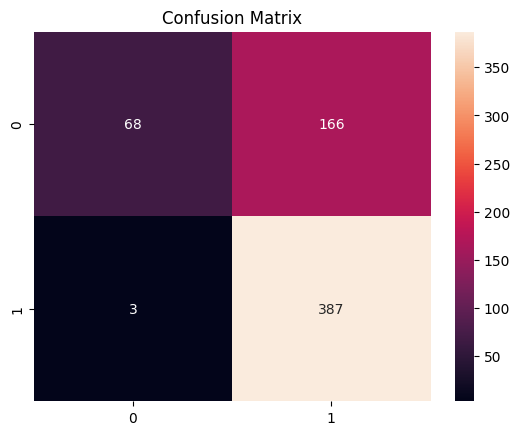

In [32]:
cm = confusion_matrix(true_labels, pred_labels)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [33]:
classification_report(true_labels, pred_labels)

'              precision    recall  f1-score   support\n\n         0.0       0.96      0.29      0.45       234\n         1.0       0.70      0.99      0.82       390\n\n    accuracy                           0.73       624\n   macro avg       0.83      0.64      0.63       624\nweighted avg       0.80      0.73      0.68       624\n'

In [34]:
model.save("pneumonia_model.h5")

/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
model.save("pneumonia_model.keras")